### Sobre o notebook

Esse notebook contém diversos desafios envolvendo os aprendizados de cada aula. É um notebook construído com o enunciado de cada desafio e com espaço para construir e executar suas soluções. Se for necessário adicionar mais células de código para solucionar o desafio, fique à vontade para acrescentar.

# Aula 1

### Desafio 1

Faça a leitura da base de dados de diabetes e realize a divisão dos dados em variáveis explicativas e variável alvo (x e y).

In [1]:
import pandas as pd 

dataSet = pd.read_csv('./diabetes.csv')
dataSet.head()

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1


In [2]:
y = dataSet.diabetes
x = dataSet.drop('diabetes', axis=1)

### Desafio 2

Realize a divisão dos dados entre treino e teste.

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

### Desafio 3

Crie 2 modelos utilizando os algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) e avalie a acurácia de treino e teste, escolhendo valores para o parâmetro `max_depth` para os modelos não se especializarem demais no padrão dos dados de treino.

In [4]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=10)

tree.fit(x_train, y_train)
tree_score_train = tree.score(x_train, y_train)
tree_score_test = tree.score(x_test, y_test)
print(f'tree train score: {tree_score_train}')
print(f'tree test score: {tree_score_test}')

tree train score: 0.911864406779661
tree test score: 0.6363636363636364


In [5]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=10)

rfc.fit(x_train, y_train)
rfc_score_train = rfc.score(x_train, y_train)
rfc_score_test = rfc.score(x_test, y_test)
print(f'tree train score: {rfc_score_train}')
print(f'tree test score: {rfc_score_test}')

tree train score: 1.0
tree test score: 0.7070707070707071


### Desafio 4

Construa uma matriz de confusão para cada um dos modelos para avaliar o desempenho das previsões.

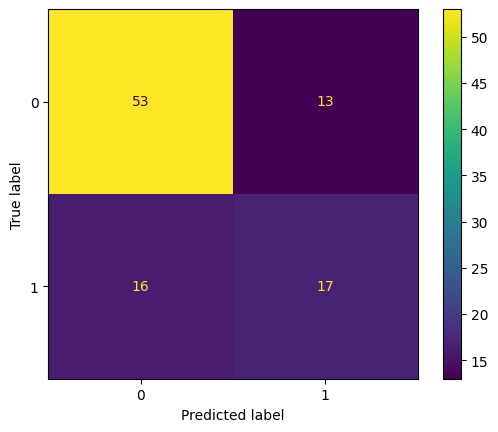

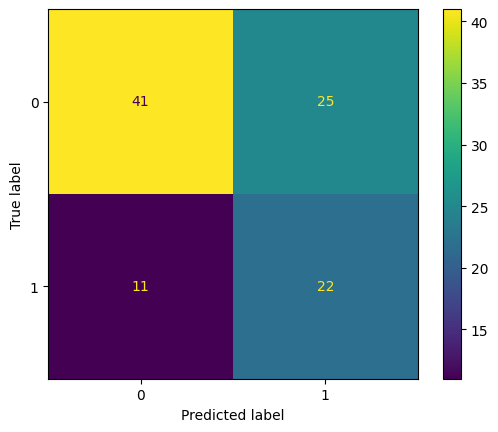

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

rfc_y_pred = rfc.predict(x_test)
tree_y_pred = tree.predict(x_test)

rfc_vis = ConfusionMatrixDisplay(confusion_matrix(y_test, rfc_y_pred))
rfc_vis.plot();
tree_vis = ConfusionMatrixDisplay(confusion_matrix(y_test, tree_y_pred))
tree_vis.plot();

# Aula 2

### Desafio 1

Extraia as métricas acurácia, recall, precisão e F1-Score dos modelos de classificação gerados no desafio da aula 1.

In [8]:
from sklearn.metrics import recall_score, f1_score, accuracy_score

tree_recall = recall_score(y_test, tree_y_pred)
tree_f1 = f1_score(y_test, tree_y_pred)
tree_score = accuracy_score(y_test, tree_y_pred)

rfc_recall = recall_score(y_test, rfc_y_pred)
rfc_f1 = f1_score(y_test, rfc_y_pred)
rfc_score = accuracy_score(y_test, rfc_y_pred)

print({
    tree_recall,
    tree_f1,
    tree_score,
    rfc_recall,
    rfc_f1,
    rfc_score
})

{0.6666666666666666, 0.55, 0.5151515151515151, 0.5396825396825397, 0.6363636363636364, 0.7070707070707071}


### Desafio 2

Obtenha a curva ROC e a métrica AUC dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

Tree AUC 0.6439393939393938 
 RFC AUC 0.659090909090909


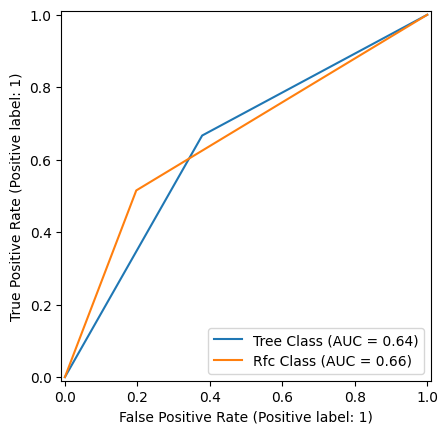

In [14]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

tree_disp = RocCurveDisplay.from_predictions(y_test, tree_y_pred, name="Tree Class")
tree_auc = roc_auc_score(y_test, tree_y_pred)
rfc_disp = RocCurveDisplay.from_predictions(y_test, rfc_y_pred, ax=tree_disp.ax_, name="Rfc Class")
rfc_auc = roc_auc_score(y_test, rfc_y_pred)

print(f'Tree AUC {tree_auc} \n RFC AUC {rfc_auc}')


### Desafio 3

Obtenha a curva precisão x recall e a métrica AP dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

### Desafio 4

Gere os relatórios de métricas dos modelos de classificação gerados no desafio da aula 1.

# Aula 3

### Desafio 1

Crie uma função para calcular o intervalo de confiança dos resultados de uma validação cruzada com 2 desvios padrão. A função precisa ter um parâmetro para receber uma lista com os desempenhos da validação cruzada e outro para apresentar o nome do modelo utilizado na validação cruzada. Exemplo de retorno da função:

> Intervalo de confiança ("nome do modelo"): ["valor mínimo do intervalo", "valor máximo do intervalo"]



### Desafio 2

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada com o método [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), usando 10 partes e embaralhando os dados antes da separação. Use o método [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) que não retorna o tempo de execução, apenas as métricas.

### Desafio 3

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada (`cross_val_score`) com o método [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold), usando 10 partes e embaralhando os dados antes da separação e avaliando a métrica F1-Score.

### Desafio 4

Avalie o desempenho dos modelos utilizando a validação cruzada (`cross_val_score`) com o método [`LeaveOneOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

O método LeaveOneOut vai gerar um modelo para cada uma das linhas da base de dados, portanto a lista de resultados terá taxa de acerto apenas de 0 ou 1 para cada modelo. Dessa forma, extraia apenas a média do resultado, sem utilizar o intervalo de confiança.


# Aula 4

### Desafio 1

Verifique a proporção de dados da variável alvo do conjunto de dados de diabetes. Essa análise pode ser feita a partir da porcentagem de dados ou com a utilização de um gráfico de contagem para entender se há um desbalanceamento de dados.

### Desafio 2

Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o oversampling com [`SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

### Desafio 3

 Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o undersampling com [`Nearmiss`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) na sua versão 3, obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

### Desafio 4

Escolha o modelo que obteve o melhor desempenho ao comparar as estratégias de oversampling e undersampling e realize o teste do modelo nos dados de teste que foram separados no início dos desafios.